In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("A:\project & example python\project\Advertising\cleandata.csv")
df.head()
_df = df.drop("Unnamed: 0",axis="columns")
_df.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported
0,0001_01,0,B/0/P,TRAPPIST-1e,39.0,0,Maham Ofracculy,0
1,0002_01,0,F/0/S,TRAPPIST-1e,24.0,0,Juanna Vines,1
2,0003_01,0,A/0/S,TRAPPIST-1e,58.0,1,Altark Susent,0
3,0003_02,0,A/0/S,TRAPPIST-1e,33.0,0,Solam Susent,0
4,0004_01,0,F/1/S,TRAPPIST-1e,16.0,0,Willy Santantines,1


In [2]:
_df["Transported"].value_counts()
_df["CryoSleep"]

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    1
8690    0
8691    0
8692    0
Name: CryoSleep, Length: 8693, dtype: int64

In [3]:
_df.corr()["Transported"]

CryoSleep      0.460132
Age           -0.075026
VIP           -0.037261
Transported    1.000000
Name: Transported, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
X = _df.drop(["Cabin","Destination","Name","PassengerId","Transported","Age","VIP"],axis=1)
Y = df["Transported"]

In [5]:
X_trian,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [9]:
operations = [("scaler" , scaler),("knn",knn)]
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [10]:
 from sklearn.model_selection import GridSearchCV
 k_values = list(range(1,30))
 param_grid = {"knn__n_neighbors" : k_values}
 full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy")
 print(full_cv_classifier.fit(X_trian,Y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')


In [11]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=8))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=8),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 8,
 'knn__p': 2,
 'knn__weights': 'uniform'}

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.019150      0.003422         0.364664        0.074602   
1        0.022937      0.014033         0.390359        0.080977   
2        0.016732      0.005927         0.329583        0.101049   
3        0.013186      0.002219         0.241457        0.035255   
4        0.012566      0.001353         0.222639        0.025549   
5        0.011409      0.001276         0.194645        0.010184   
6        0.014247      0.007084         0.212636        0.048036   
7        0.007988      0.000903         0.148792        0.027868   
8        0.007691      0.000874         0.139620        0.020606   
9        0.007784      0.001315         0.133833        0.004241   
10       0.007181      0.000399         0.133642        0.003837   
11       0.008807      0.000449         0.152992        0.035863   
12       0.008639      0.001419         0.156313        0.026508   
13       0.007780      0.001164         0.141022

<AxesSubplot:>

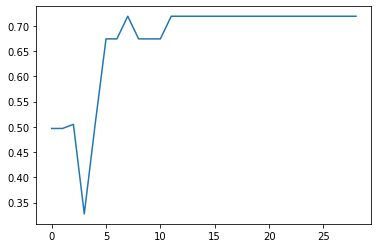

In [12]:
print(pd.DataFrame(full_cv_classifier.cv_results_))
pd.DataFrame(full_cv_classifier.cv_results_)["mean_test_score"].plot()

In [13]:
y_pred = full_cv_classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[375,  68],
       [184, 243]], dtype=int64)

In [15]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       443
           1       0.78      0.57      0.66       427

    accuracy                           0.71       870
   macro avg       0.73      0.71      0.70       870
weighted avg       0.73      0.71      0.70       870

